## Final Project Submission

Please fill out:
* Student name: Raphael Kubai Ntonja
* Student pace: part time
* Scheduled project review date/time: 28/07/2024
* Instructor name: Samwel Jane and Veronica Isiaho
* Blog post URL:


In [70]:
# Your code here - remember to use markdown cells for comments as well!
#importing pandas
import pandas as pd
#load csv files as dataframe
df = pd.read_csv('title.basics.csv')
df = pd.read_csv('bom.movie_gross.csv')
df = pd.read_csv('tn.movie_budgets.csv')



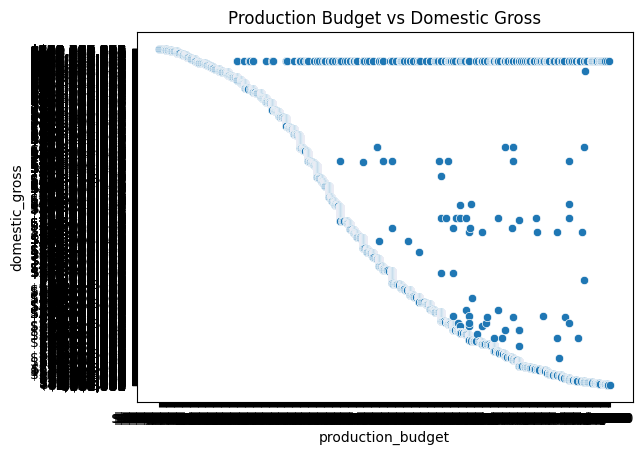

In [36]:
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn as sns
import seaborn as sns

file_path = 'tn.movie_budgets.csv'
df = pd.read_csv(file_path)

#relationship between production_budget and domestic_gross
sns.scatterplot(x='production_budget', y='domestic_gross', data=df)
plt.title('Production Budget vs Domestic Gross')
plt.show()

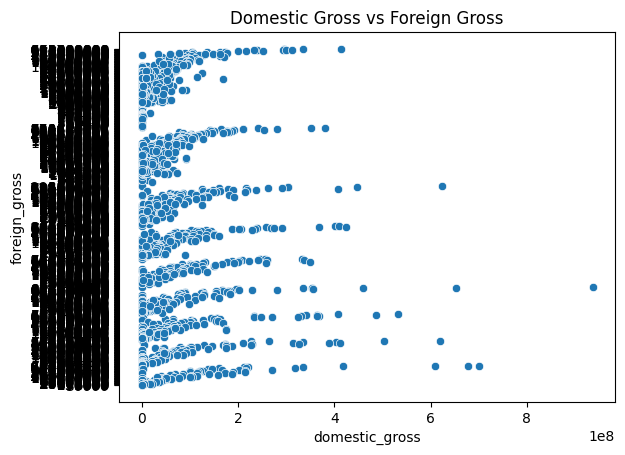

In [43]:
# Load the data
df = pd.read_csv('bom.movie_gross.csv')



# Scatter plot of domestic vs foreign gross
sns.scatterplot(x='domestic_gross', y='foreign_gross', data=df)
plt.title('Domestic Gross vs Foreign Gross')
plt.show()


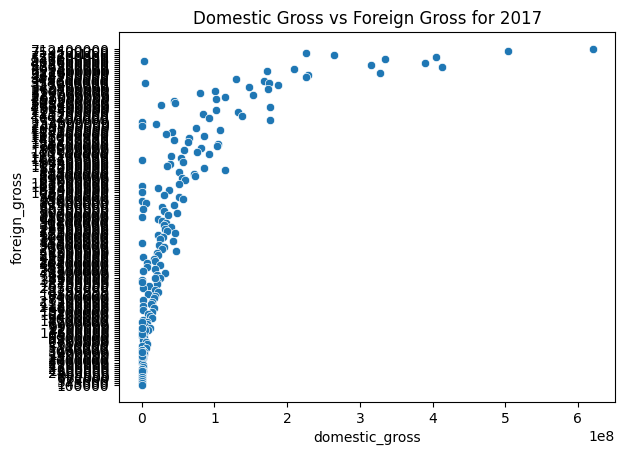

In [71]:
#visualizing the relationship between domestic gross and foreign gross for movies released in a specific year.
def plot_domestic_vs_foreign_by_year(df, year):

  # Filter the DataFrame for the specified year
  df_year = df[df['year'] == year]

  # Create the scatter plot
  sns.scatterplot(x='domestic_gross', y='foreign_gross', data=df_year)
  plt.title(f'Domestic Gross vs Foreign Gross for {year}')
  plt.show()

# Load the data
df = pd.read_csv('bom.movie_gross.csv')

# Specify the year
year_to_plot = 2017  # Replace with your desired year

# Create the plot
plot_domestic_vs_foreign_by_year(df, year_to_plot)

In [41]:
df = pd.read_csv('bom.movie_gross.csv')

# Convert foreign_gross to numeric
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Handle missing values
df.dropna(subset=['foreign_gross'], inplace=True)

# Find the movie with the highest foreign gross
highest_foreign_gross_movie = df[df['foreign_gross'] == df['foreign_gross'].max()]

print(highest_foreign_gross_movie[['title', 'foreign_gross']])

                                           title  foreign_gross
328  Harry Potter and the Deathly Hallows Part 2    960500000.0


In [35]:
#Checking the movie with highest domestic gross
highest_domestic_gross_movie = df[df['domestic_gross'] == df['domestic_gross'].max()]

# Print the movie title and domestic gross
print(highest_domestic_gross_movie[['title', 'domestic_gross']])

                             title  domestic_gross
1872  Star Wars: The Force Awakens     936700000.0


In [57]:
def find_studio_with_most_movies(df):

  studio_counts = df['studio'].value_counts()
  most_productive_studio = studio_counts.idxmax()
  return most_productive_studio

df = pd.read_csv('bom.movie_gross.csv')

# Find the studio with the most movies
most_productive_studio = find_studio_with_most_movies(df)

print("Studio with the most movies:", most_productive_studio)

Studio with the most movies: IFC


In [58]:
def find_studio_with_least_movies(df):
  studio_counts = df['studio'].value_counts()
  least_productive_studio = studio_counts.idxmin()
  return least_productive_studio

df = pd.read_csv('bom.movie_gross.csv')

# Find the studio with the least movies
least_productive_studio = find_studio_with_least_movies(df)

print("Studio with the least movies:", least_productive_studio)

Studio with the least movies: TA


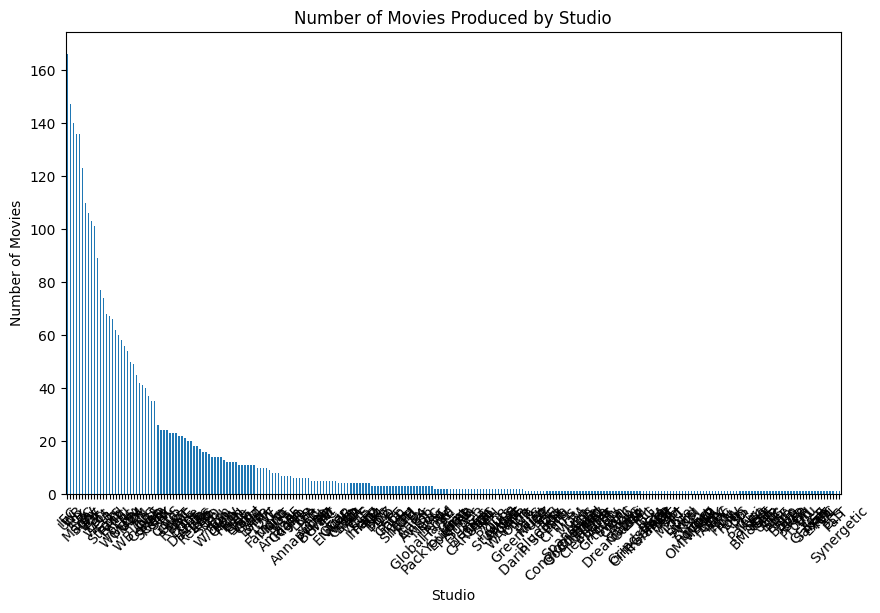

In [66]:
#Finding the number of movies produced by each studio
def plot_studio_production(df):
  studio_counts = df['studio'].value_counts()
  studio_counts.plot(kind='bar', figsize=(10, 6))
  plt.title('Number of Movies Produced by Studio')
  plt.xlabel('Studio')
  plt.ylabel('Number of Movies')
  plt.xticks(rotation=45)
  plt.show()

df = pd.read_csv('bom.movie_gross.csv')

# Creating the bar chart
plot_studio_production(df)


In [10]:
import pandas as pd

def count_genres(df):
   # creating a new DataFrame with one genre per row
  df_genres = df.explode('genres')

  # Count the frequency of each genre
  genre_counts = df_genres['genres'].value_counts()

  return genre_counts

df = pd.read_csv('title.basics.csv')

# Count the genres
genre_counts = count_genres(df)

# Print the most common genres
print(genre_counts.head(10))


genres
Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: count, dtype: int64


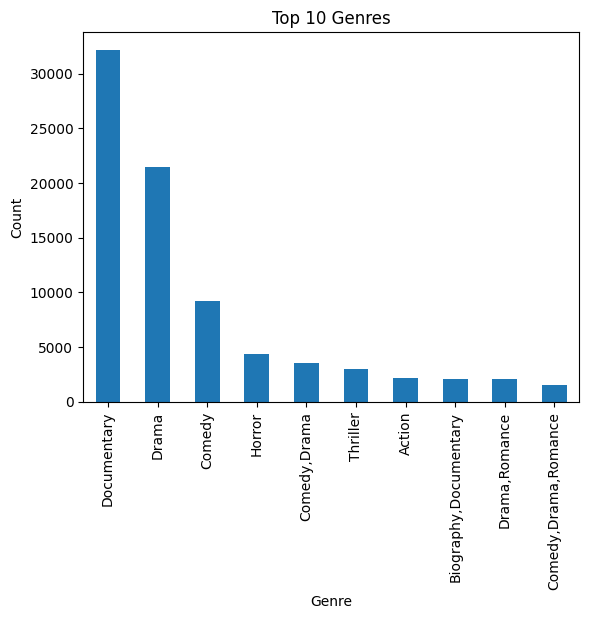

In [11]:
def plot_top_genres(df):

  # Count the occurrences of each genre
  genre_counts = df['genres'].value_counts()

  # Plot the top 10 genres
  genre_counts[:10].plot(kind='bar')
  plt.title('Top 10 Genres')
  plt.xlabel('Genre')
  plt.ylabel('Count')
  plt.show()

df = pd.read_csv('title.basics.csv')

# Plot the top 10 genres
plot_top_genres(df)

In [15]:
import datetime

def calculate_movie_age(df):
  current_year = datetime.datetime.now().year
  df['age'] = current_year - df['start_year']
  return df

# Load the data
df = pd.read_csv('title.basics.csv')

# Calculate the age of each movie
df = calculate_movie_age(df)

print(df.head())

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  age  
0        2013            175.0    Action,Crime,Drama   11  
1        2019            114.0       Biography,Drama    5  
2        2018            122.0                 Drama    6  
3        2018              NaN          Comedy,Drama    6  
4        2017             80.0  Comedy,Drama,Fantasy    7  


In [16]:
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'age'],
      dtype='object')

In [27]:
def clean_and_convert(df):

  # Remove '$' and commas from the columns
  df['production_budget'] = df['production_budget'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
  df['domestic_gross'] = df['domestic_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

  # Convert the columns to numeric
  df['production_budget'] = pd.to_numeric(df['production_budget'])
  df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])

  return df

df = pd.read_csv('tn.movie_budgets.csv')

# Clean and convert the data
df = clean_and_convert(df)

# Calculate the correlation
correlation_matrix = df[['production_budget', 'domestic_gross']].corr()

# Print the correlation matrix
print(correlation_matrix)


                   production_budget  domestic_gross
production_budget           1.000000        0.685682
domestic_gross              0.685682        1.000000
